# 戴入所需套件

In [ ]:
pip install auto-sklearn

     |████████████████████████████████| 6.4 MB 14.3 MB/s 
     |████████████████████████████████| 38.1 MB 382 kB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 1.1 MB 48.5 MB/s 
     |████████████████████████████████| 837 kB 5.5 MB/s 
     |████████████████████████████████| 4.3 MB 51.6 MB/s 
     |████████████████████████████████| 4.0 MB 25.3 MB/s 
     |████████████████████████████████| 260 kB 82.2 MB/s 
     |████████████████████████████████| 596 kB 58.5 MB/s 
     |████████████████████████████████| 136 kB 73.8 MB/s 
     |████████████████████████████████| 45 kB 2.8 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.6-py3-none-any.whl size=6602835 sha256=f9984d90e3813828c560a73dd037aa69c9dc46af0a4cf8fd868cd1ce08671523
  Stored in directory: /root/.cache/pip/wheels/6a/70/48/db9c00457f87a751083ca0d5c99bf34387dde818c705bd9800
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7043 sha256=63724

In [ ]:
!pip install -U scikit-learn

     |████████████████████████████████| 24.8 MB 2.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
auto-sklearn 0.14.6 requires scikit-learn<0.25.0,>=0.24.0, but you have scikit-learn 1.0.2 which is incompatible.


# 讀取資料

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,classification_report,ConfusionMatrixDisplay,accuracy_score
from pprint import pprint

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer  = load_breast_cancer()

features = pd.DataFrame(
    cancer.data, columns=cancer.feature_names
)
target = pd.Series(cancer.target)


features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
print (cancer.target_names)

['malignant' 'benign']


In [ ]:
features['target'] = (cancer['target'] == 0)
judge={True:1,False:0}
features['target']=features['target'].map(judge)
features['target'].value_counts()

#原始資料集0為malignant(惡性),轉換1為malignant(惡性),0為benign(良性)較為直觀

0    357
1    212
Name: target, dtype: int64

In [ ]:
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# 資料探索EDA

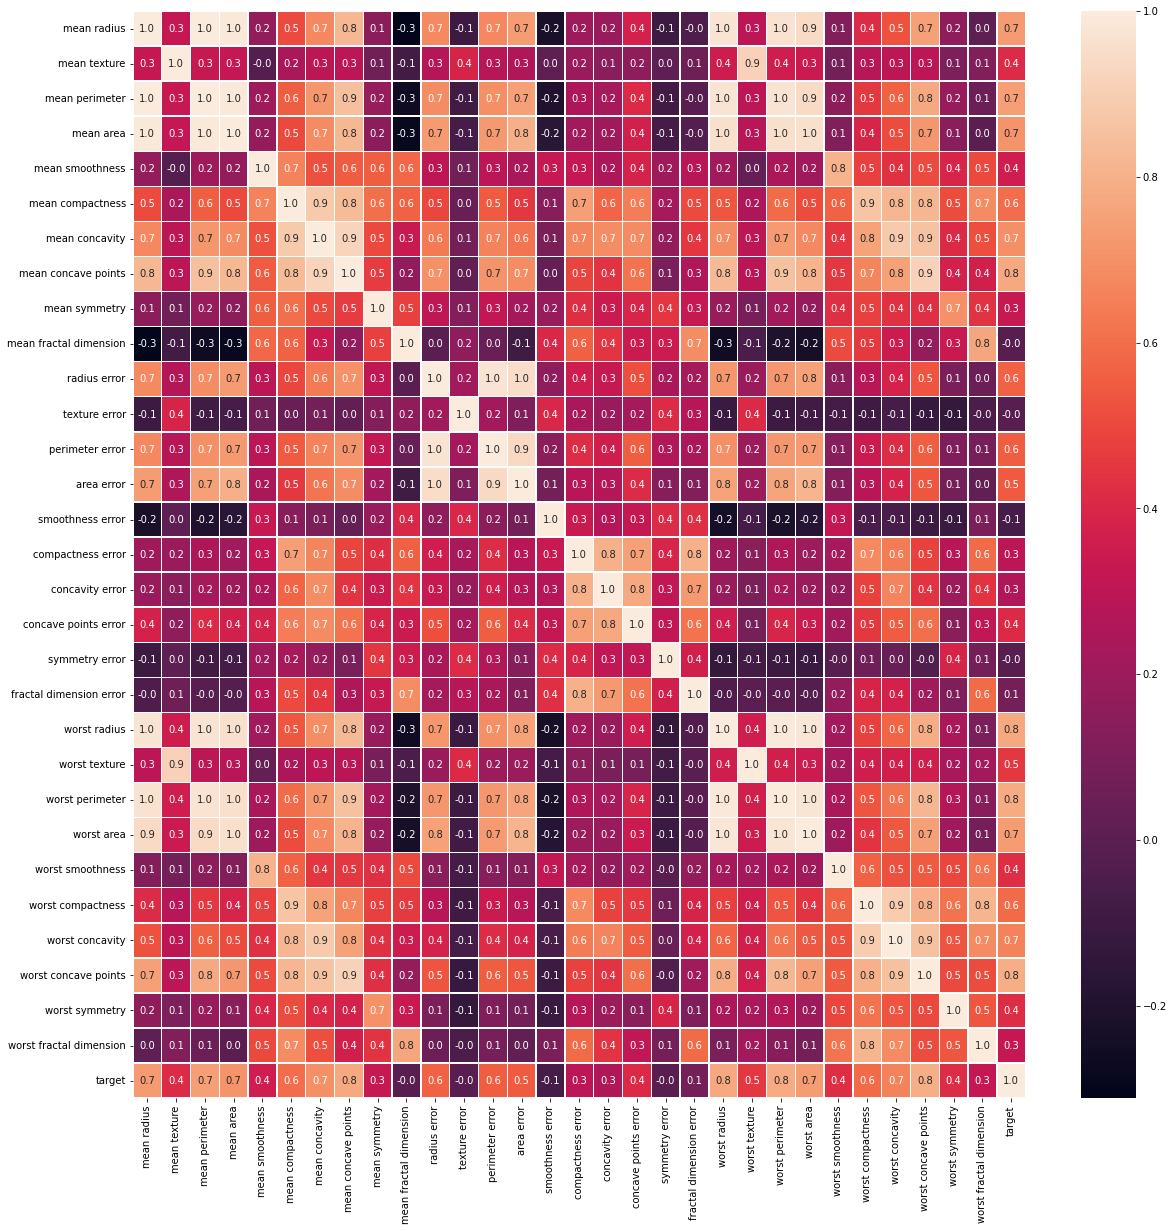

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(features.corr(),annot=True,linewidth='.4',fmt='.1f')
plt.show()

#mean radius與mean parimeter_,mean area,worst radius,worst perimeter有很強的正相關,要降維應可保留其一,後續用特徵篩選後再來確認     

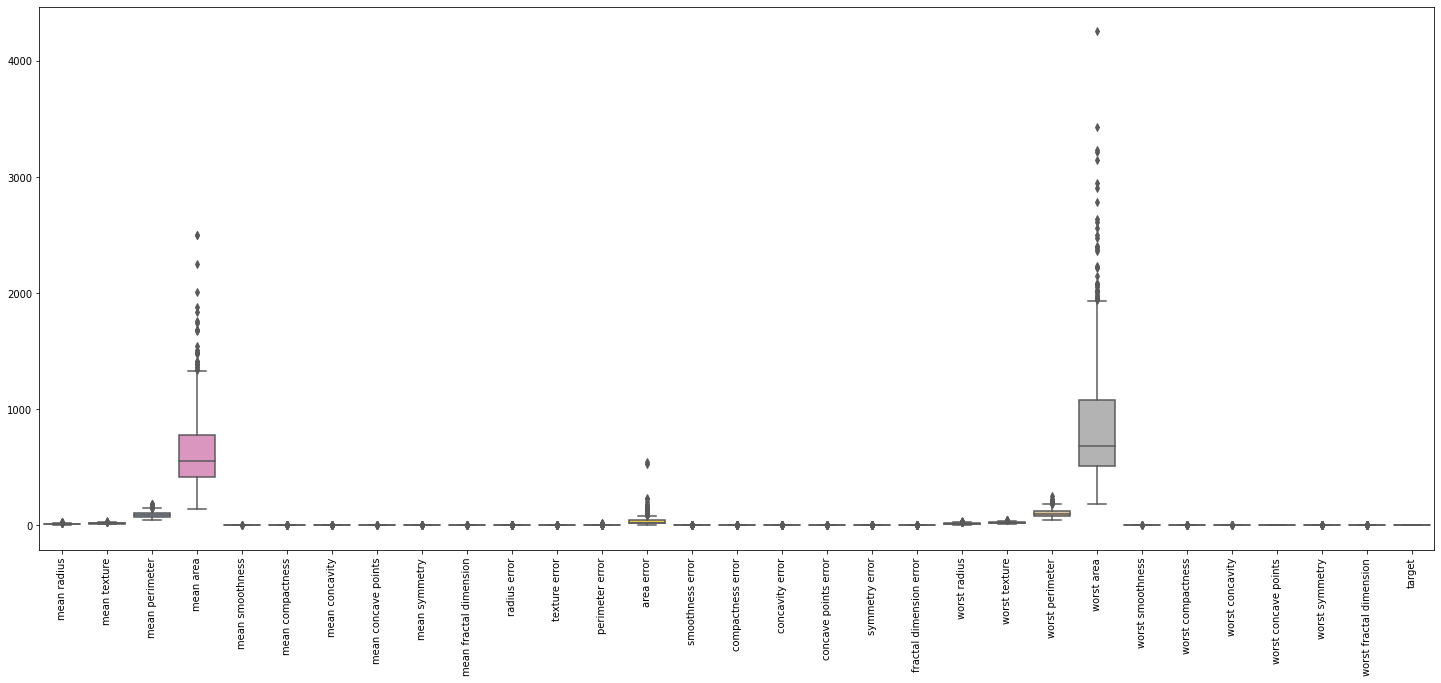

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(data=features,palette='Set2')
plt.xticks(rotation=90)
plt.show()
# 有離群值

In [ ]:
print("有離群值欄位'mean perimeter','mean area','area error','worst perimeter','worst area'共計資料筆數:",
    features[(features['mean perimeter']>((features['mean perimeter'].std())*3))|
       (features['mean area']>((features['mean area'].std())*3))|
       (features['area error']>((features['area error'].std())*3))|
       (features['worst perimeter']>((features['worst perimeter'].std())*3))|
       (features['worst area']>((features['worst area'].std())*3))
       ].target.sum())


#原本資料1(M惡性)為212筆,調出有離群值超出3倍的STD的欄位'perimeter_se','area_mean','area_se','perimeter_worst','area_worst'的資料筆數合計211筆
#​有離群值,會影響準確度,應後續去除;但因惡性樣本數若去除後,幾乎無惡性樣本可做判斷,故不做去除處理,改用標準化來減少影響

有離群值欄位'mean perimeter','mean area','area error','worst perimeter','worst area'共計資料筆數: 211


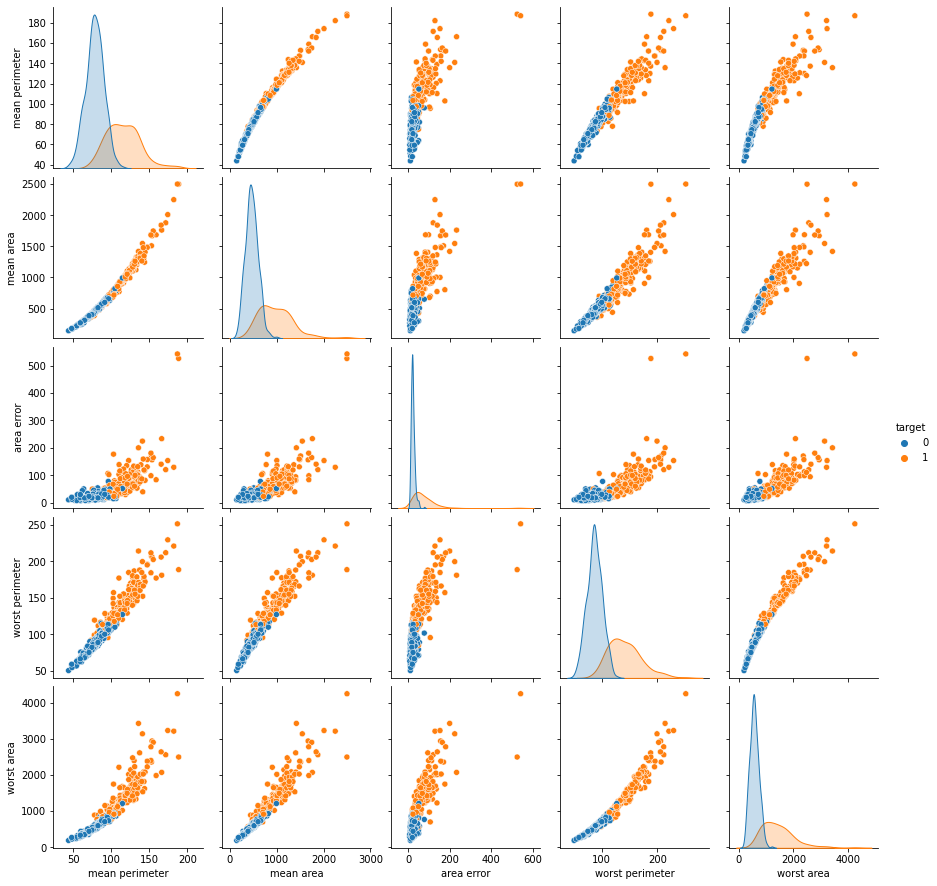

In [ ]:
#找幾個元素來畫圖,更清楚
#若為惡性(1))數值都偏高
sns.pairplot(data=features[['mean perimeter','mean area','area error','worst perimeter','worst area','target']],hue='target')
plt.show()

In [ ]:
features.describe()
#欄位數值區隔太大,提升精準度可試做標準化normalization,

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


0    357
1    212
Name: target, dtype: int64


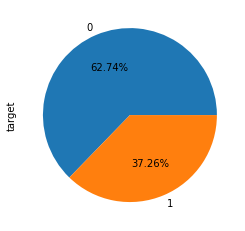

In [ ]:
#資料不平衡,後續測試oversample,看模型是否合適
print(features.target.value_counts())
features.target.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

# 分割資料

#特徵資料常態分布化

In [ ]:
X=features.drop(['target'],axis=1)
y=features['target']

#常態分佈化,使離群值影響降低
X=(X - X.mean()) / (X.std())


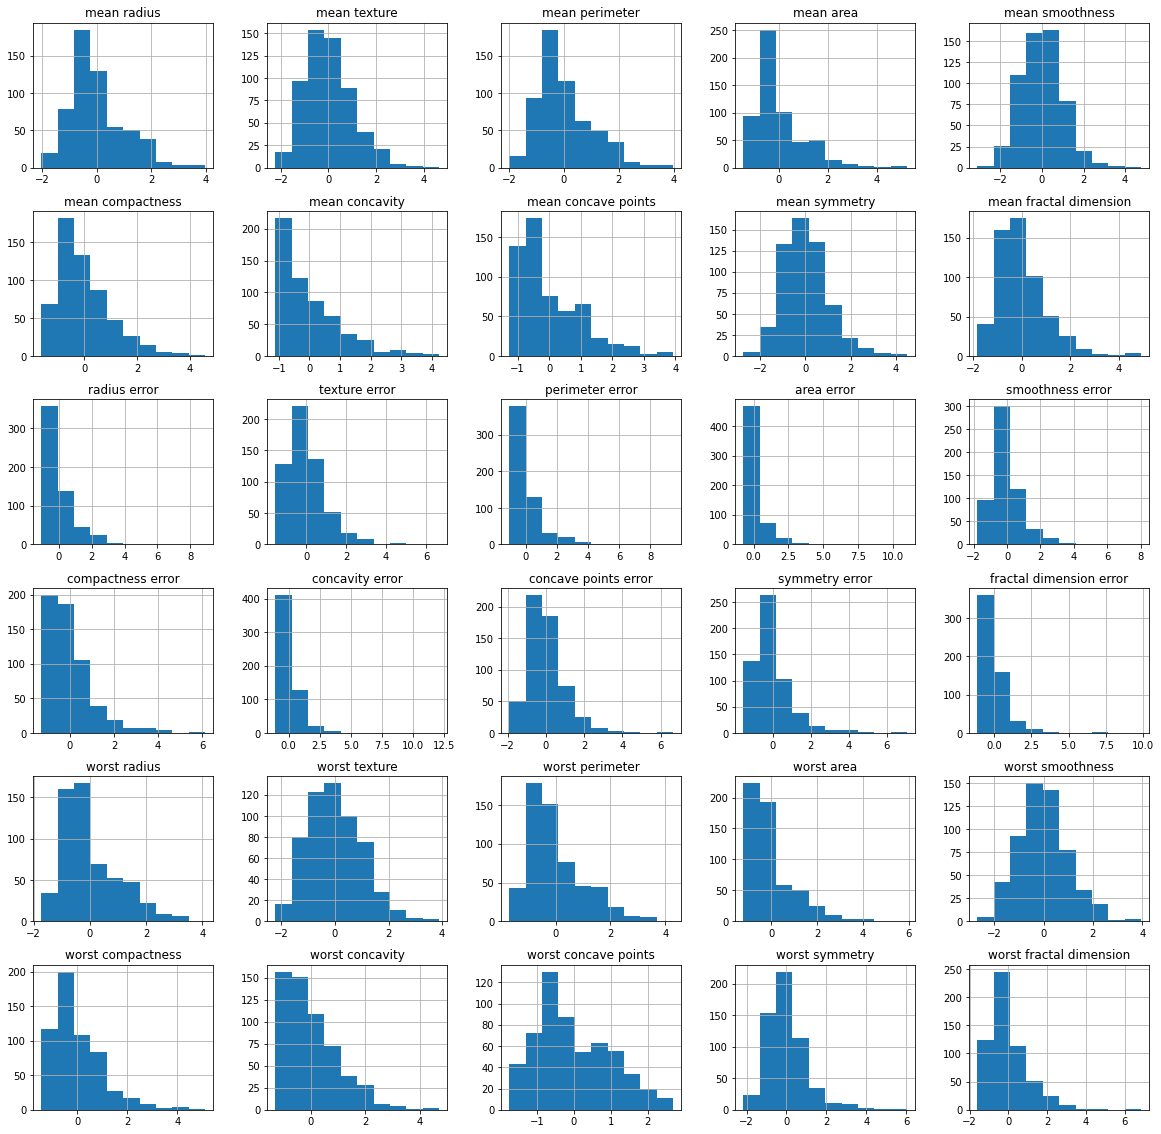

In [ ]:
#常態分佈化後結果
X.hist(figsize=(20,20))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
#stratify=y 使惡性資料按比例分配在測試集和訓練集中,可避免分配不均
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)
print("y_train malignant(1)數量: ",y_train.sum())
print("y_test malignant(1)數量: ",y_test.sum())

X_train:  (398, 30)
X_test:  (171, 30)
y_train:  (398,)
y_test:  (171,)
y_train malignant(1)數量:  148
y_test malignant(1)數量:  64


# 機器學習

# 用auto sklearn挑選適合模型,不適用大型數據集,會跑很久

In [ ]:
#參考資料auto sklearn:(金手指)
# https://towardsdatascience.com/auto-sklearn-scikit-learn-on-steroids-42abd4680e94
# https://automl.github.io/auto-sklearn/master/index.html
# https://ithelp.ithome.com.tw/articles/10276333

## 版本一

In [ ]:
import autosklearn.classification


automlclassifierV1 = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=180, #採索每個模型限制時間,單位秒
    per_run_time_limit=40, #機器模型訓練時間
    resampling_strategy='cv', #處理過擬合方法,使用交叉驗証,
    resampling_strategy_arguments={'folds': 5}
)
automlclassifierV1.fit(X_train, y_train)



AutoSklearnClassifier(per_run_time_limit=40, resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 5},
                      time_left_for_this_task=180)

召回率:  0.984375
精準度:  1.0


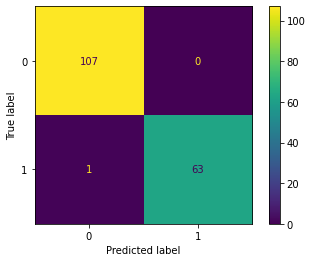


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       107
           1       1.00      0.98      0.99        64

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [ ]:
y_pred= automlclassifierV1.predict(X_test)

from sklearn.metrics import confusion_matrix,recall_score,classification_report,ConfusionMatrixDisplay,accuracy_score

conf_matrix= confusion_matrix(y_test,y_pred)

print("召回率: ", conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]))
print("精準度: ", conf_matrix[1,1]/(conf_matrix[0,1]+conf_matrix[1,1]))

# 畫圖
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()


print("")
print(classification_report(y_test, y_pred))

#結果很不錯

In [ ]:
automlclassifierV1.leaderboard()

#auto sklearn權重第一名為mlp,因資料集並不複雜,覺得用深度學習mlp有點太過隆重

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
6,1,0.24,mlp,0.032663,4.759427
3,2,0.30,mlp,0.035176,4.842112
17,3,0.10,mlp,0.037688,19.573318
4,4,0.06,mlp,0.037688,7.377347
18,5,0.04,gradient_boosting,0.037688,4.277709
19,6,0.02,extra_trees,0.037688,15.719558
7,7,0.02,extra_trees,0.047739,8.488050
14,8,0.08,mlp,0.050251,9.880287
5,9,0.04,random_forest,0.052764,9.416613


In [ ]:
pprint(automlclassifierV1.show_models(), indent=4)
#版本一 集成結果參數

{   3: {   'cost': 0.03517587939698494,
           'ensemble_weight': 0.3,
           'estimators': [   {   'balancing': Balancing(random_state=1),
                                 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f5255999190>,
                                 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f5255a67410>,
                                 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f5255c08050>,
                                 'sklearn_classifier': MLPClassifier(activation='tanh', alpha=0.0001363185819149026, beta_1=0.999,
              beta_2=0.9, early_stopping=True,
              hidden_layer_sizes=(115, 115, 115),
              learning_rate_init=0.00018009776276177523, max_iter=32,
              n_iter_no_change=32, random_state=1, verbose=0, warm_start=True)},
             

## 版本二

In [ ]:
#版本二 auto sklearn最新版本
from autosklearn.experimental.askl2 import AutoSklearn2Classifier

automlclassifierV2 = AutoSklearn2Classifier(time_left_for_this_task=180, per_run_time_limit=40)
automlclassifierV2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/smac/intensification/parallel_scheduling.py:154: UserWarning: SuccessiveHalving is executed with 1 workers only. Consider to use pynisher to use all available workers.
  f"{self.__class__.__name__} is executed with {num_workers} workers only. "


AutoSklearn2Classifier(metric=accuracy, per_run_time_limit=40,
                       time_left_for_this_task=180)

召回率:  0.96875
精準度:  1.0


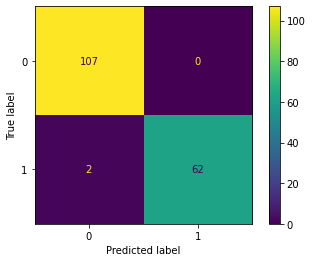


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           1       1.00      0.97      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [ ]:
y_pred= automlclassifierV2.predict(X_test)

from sklearn.metrics import confusion_matrix,recall_score,classification_report,ConfusionMatrixDisplay,accuracy_score

conf_matrix= confusion_matrix(y_test,y_pred)

print("召回率: ",conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]))
print("精準度: ",conf_matrix[1,1]/(conf_matrix[0,1]+conf_matrix[1,1]))

# 畫圖
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()


print("")
print(classification_report(y_test, y_pred))

In [ ]:
automlclassifierV2.leaderboard()

#列出auto-sklearn ensemble_wight,第一位比重較高的為sgd,故我們挑選sgd再來跑機器學習

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
9,1,0.64,sgd,0.030151,5.516132
6,2,0.02,gradient_boosting,0.032663,10.753537
8,3,0.02,extra_trees,0.040201,6.710552
2,4,0.02,extra_trees,0.047739,6.855451
18,5,0.04,gradient_boosting,0.050251,6.758262
3,6,0.02,gradient_boosting,0.055276,7.175409
14,7,0.02,gradient_boosting,0.062814,8.639034
19,8,0.04,extra_trees,0.070352,9.212306
17,9,0.02,extra_trees,0.087940,6.612164


In [ ]:
df_cv_results = pd.DataFrame(automlclassifierV2.cv_results_).sort_values(by = 'mean_test_score', ascending = False)
df_cv_results

,mean_test_score,mean_fit_time,params,rank_test_scores,status,budgets,param_balancing:strategy,param_classifier:__choice__,param_data_preprocessor:__choice__,param_feature_preprocessor:__choice__,...,param_classifier:mlp:validation_fraction,param_classifier:sgd:epsilon,param_classifier:sgd:eta0,param_classifier:sgd:l1_ratio,param_classifier:sgd:power_t,param_data_preprocessor:feature_type:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction,param_data_preprocessor:feature_type:numerical_transformer:rescaling:quantile_transformer:n_quantiles,param_data_preprocessor:feature_type:numerical_transformer:rescaling:quantile_transformer:output_distribution,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_max,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_min
4,0.969849,6.878485,"{'balancing:strategy': 'weighting', 'classifie...",1,Success,6.25,weighting,gradient_boosting,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,0.002589,NaN,NaN,NaN,NaN
7,0.969849,5.516132,"{'balancing:strategy': 'weighting', 'classifie...",1,Success (but do not advance to higher budget),6.25,weighting,sgd,feature_type,no_preprocessing,...,NaN,NaN,0.000002,7.163773e-09,NaN,0.000255,NaN,NaN,NaN,NaN
17,0.967337,10.753537,"{'balancing:strategy': 'weighting', 'classifie...",3,Success,100.00,weighting,gradient_boosting,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,0.002589,NaN,NaN,NaN,NaN
16,0.967337,8.371056,"{'balancing:strategy': 'weighting', 'classifie...",3,Success,25.00,weighting,gradient_boosting,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,0.002589,NaN,NaN,NaN,NaN
5,0.962312,6.853358,"{'balancing:strategy': 'weighting', 'classifie...",5,Success,6.25,weighting,mlp,feature_type,no_preprocessing,...,0.1,NaN,NaN,NaN,NaN,0.052173,NaN,NaN,NaN,NaN
6,0.959799,6.710552,"{'balancing:strategy': 'weighting', 'classifie...",6,Success,6.25,weighting,extra_trees,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,0.003691,NaN,NaN,NaN,NaN
0,0.952261,6.855451,"{'balancing:strategy': 'weighting', 'classifie...",7,Success,6.25,weighting,extra_trees,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,0.118408,NaN,NaN,0.766873,0.286333
14,0.952261,10.522025,"{'balancing:strategy': 'none', 'classifier:__c...",7,Success,6.25,none,mlp,feature_type,no_preprocessing,...,0.1,NaN,NaN,NaN,NaN,0.021708,1822.0,normal,NaN,NaN
8,0.952261,8.334716,"{'balancing:strategy': 'none', 'classifier:__c...",7,Success,6.25,none,gradient_boosting,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,NaN,82.0,normal,NaN,NaN
18,0.949749,6.758262,"{'balancing:strategy': 'weighting', 'classifie...",10,Success,6.25,weighting,gradient_boosting,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,0.047508,NaN,NaN,NaN,NaN


In [ ]:
pprint(automlclassifierV2.show_models(), indent=4)
#版本二集成結果參數

{   2: {   'balancing': Balancing(random_state=1, strategy='weighting'),
           'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f5248ce93d0>,
           'cost': 0.04773869346733669,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f5248af4750>,
           'ensemble_weight': 0.02,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f5248ce9410>,
           'model_id': 2,
           'rank': 6,
           'sklearn_classifier': None},
    3: {   'balancing': Balancing(random_state=1, strategy='weighting'),
           'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f524aba7250>,
           'cost': 0.05527638190954774,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f524b39eb10>,
     

# SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=5)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(max_iter=5)

## 超參數選擇

In [ ]:
from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

'''
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

'''

# use a full grid over all parameters
param_grid = {
    "loss":["hinge","modified_huber","log"],
    "penalty":["l1","l2","elasticnet"],
    "average": [True, False],
    "l1_ratio": np.linspace(0, 1, num=10),
    "alpha": np.power(10, np.arange(-2, 1, dtype=float)),
}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

'''
print(
    "GridSearchCV took %.2f seconds for %d candidate parameter settings."
    % (time() - start, len(grid_search.cv_results_["params"]))
)

report(grid_search.cv_results_)'''

串流輸出內容已截斷至最後 5000 行。
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packa

'\nprint(\n    "GridSearchCV took %.2f seconds for %d candidate parameter settings."\n    % (time() - start, len(grid_search.cv_results_["params"]))\n)\n\nreport(grid_search.cv_results_)'

In [ ]:
#最好的結果參數
best=grid_search.best_params_
best

{'alpha': 0.01,
 'average': True,
 'l1_ratio': 0.0,
 'loss': 'log',
 'penalty': 'elasticnet'}

In [ ]:
#再跑一次,使用上述跑出來的參數

clf = SGDClassifier(
    alpha=best['alpha'],
    average=best['average'],
    l1_ratio=best['l1_ratio'],
    loss= best['loss'],
    penalty=best['penalty'],
    max_iter=5)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(alpha=0.01, average=True, l1_ratio=0.0, loss='log', max_iter=5,
              penalty='elasticnet')

召回率:  0.953125
精準度:  1.0


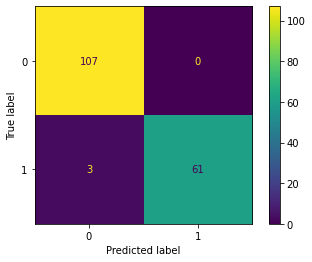


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       107
           1       1.00      0.95      0.98        64

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred= clf.predict(X_test)


# 畫圖
conf_matrix= confusion_matrix(y_test,y_pred)

print("召回率: ", conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) )
print("精準度: ",conf_matrix[1,1]/(conf_matrix[0,1]+conf_matrix[1,1]))

ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()


print("")
print(classification_report(y_test, y_pred))

#改用SGDClassifier效果也還可以

# SGDClassifier測試過取樣

In [ ]:
X=features.drop(['target'],axis=1)
y=features['target']

#常態分佈化,使離群值影響降低
X=(X - X.mean()) / (X.std())


# 整個數據集進行劃分
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)


print("原始訓練集包含樣本數量(X_train): ", len(X_train))
print("原始測試集包含樣本數量(X_test): ", len(X_test))
print("原始訓練集包含標籤數量(y_train): ", len(y_train))
print("原始測試集包含標籤數量(y_test): ", len(y_test))
print("原始樣本總數: ", len(X_train)+len(X_test))



# 上採樣
#因預測的y不平衡, 訓練資料oversample取樣,測試資料不變
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train_oversample, y_train_oversample = ros.fit_resample(X_train, y_train)


print("")
print("上採樣訓練集包含X樣本數量X_train_oversample: ", len(X_train_oversample))
print("原始測試集包含樣本數量X_test: ", len(X_test))
print("上採樣訓練集包含y樣本數量y_train_oversample: ", len(y_train_oversample))
print("原始測試集包含樣本數量y_test: ", len(y_test))

原始訓練集包含樣本數量(X_train):  398
原始測試集包含樣本數量(X_test):  171
原始訓練集包含標籤數量(y_train):  398
原始測試集包含標籤數量(y_test):  171
原始樣本總數:  569

上採樣訓練集包含X樣本數量X_train_oversample:  498
原始測試集包含樣本數量X_test:  171
上採樣訓練集包含y樣本數量y_train_oversample:  498
原始測試集包含樣本數量y_test:  171


# oversample結果

In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(
    alpha=best['alpha'],
    average=best['average'],
    l1_ratio=best['l1_ratio'],
    loss= best['loss'],
    penalty=best['penalty'],
    max_iter=5)


clf.fit(X_train_oversample, y_train_oversample)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(alpha=0.01, average=True, l1_ratio=0.0, loss='log', max_iter=5,
              penalty='elasticnet')

召回率:  0.9841269841269841
精準度:  0.8857142857142857


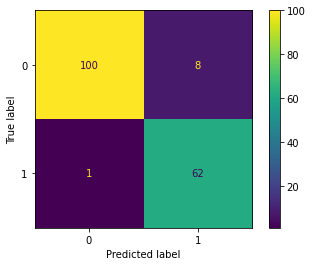


              precision    recall  f1-score   support

           0       0.99      0.93      0.96       108
           1       0.89      0.98      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.94       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred= clf.predict(X_test)

# 畫圖
conf_matrix= confusion_matrix(y_test,y_pred)

print("召回率: ", conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]))
print("精準度: ",conf_matrix[1,1]/(conf_matrix[0,1]+conf_matrix[1,1]))

ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()


print("")
print(classification_report(y_test, y_pred))

#分類結果看起來還可以,但原本良性的人被判為惡性有增加,會造成後續醫療浪費,是需要思考的地方

# 篩選特徴

In [ ]:
'''
特徵文字說明:
mean radius	半徑（點中心到邊緣的距離）平均值
mean texture 文理（灰度值的標準差）平均值
mean perimeter 周長平均值
mean area 面積平均值
mean smoothness	平滑程度（半徑內的局部變化）平均值
mean compactness 緊密度（=周長*周長/面積-1.0）平均值
mean concavity 凹度（輪廓凹部的嚴重程度）平均值
mean concave points	凹縫（輪廓的凹部分）平均值
mean symmetry 對稱性平均值
mean fractal dimension 分形維數（=海岸線近似-1）平均值
radius error 半徑（點中心到邊緣的距離）標準差
texture error 文理（灰度值的標準差）標準差
perimeter error	周長標準差
area error 面積標準差
smoothness error 平滑程度（半徑內的局部變化）標準差
compactness error 緊密度（=周長*周長/面積-1.0）標準差
concavity error	凹度（輪廓凹部的嚴重程度）標準差
concave points error 凹縫（輪廓的凹部分）標準差
symmetry error	對稱性標準差
fractal dimension error	分形維數（=海岸線近似-1）標準差
worst radius 半徑（點中心到邊緣的距離）最大值
worst texture 文理（灰度值的標準差）最大值
worst perimeter	周長最大值
worst area	面積最大值
worst smoothness 平滑程度（半徑內的局部變化）最大值
worst compactness 緊密度（=周長*周長/面積-1.0）最大值
worst concavity	凹度（輪廓凹部的嚴重程度）最大值
worst concave points 凹縫（輪廓的凹部分）最大值
worst symmetry	對稱性最大值
worst fractal dimension	分形維數（=海岸線近似-1）最大值

'''

## 使用隨機森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=1000,random_state=42)
rf.fit(X_train,y_train.values.ravel())
predictions=rf.predict(X_test)

accuracy = rf.score(X_test,predictions)
print(accuracy)

1.0


In [ ]:
# 得到特徵重要性
feature_list=X.columns.values.tolist()

importances = rf.feature_importances_.tolist()

# 轉換格式
feature_importances = [(X_test, round(importance, 2)) for X_test, importance in zip(feature_list, importances)]

# 排序
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# 對應列出明細
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: worst concave points Importance: 0.15
Variable: worst perimeter      Importance: 0.11
Variable: worst area           Importance: 0.11
Variable: mean concave points  Importance: 0.1
Variable: worst radius         Importance: 0.08
Variable: mean concavity       Importance: 0.07
Variable: mean radius          Importance: 0.05
Variable: mean perimeter       Importance: 0.05
Variable: area error           Importance: 0.04
Variable: worst concavity      Importance: 0.04
Variable: mean area            Importance: 0.03
Variable: radius error         Importance: 0.02
Variable: worst compactness    Importance: 0.02
Variable: mean texture         Importance: 0.01
Variable: mean smoothness      Importance: 0.01
Variable: mean compactness     Importance: 0.01
Variable: perimeter error      Importance: 0.01
Variable: concavity error      Importance: 0.01
Variable: concave points error Importance: 0.01
Variable: worst texture        Importance: 0.01
Variable: worst smoothness     Importance

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

['worst concave points', 'worst perimeter', 'worst area', 'mean concave points', 'worst radius', 'mean concavity', 'mean radius', 'mean perimeter', 'area error', 'worst concavity', 'mean area', 'radius error', 'worst compactness', 'mean texture', 'mean smoothness', 'mean compactness', 'perimeter error', 'concavity error', 'concave points error', 'worst texture', 'worst smoothness', 'worst symmetry', 'worst fractal dimension']
[0.15, 0.11, 0.11, 0.1, 0.08, 0.07, 0.05, 0.05, 0.04, 0.04, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]


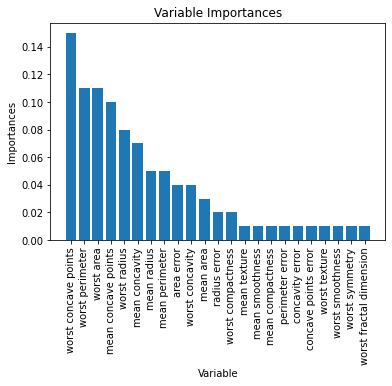

In [ ]:
#圖示特徵重要程度

important_list=[]
important_value=[]
for i in range(len(feature_importances)):
    if feature_importances[i][1]!=0:
        important_list.append(feature_importances[i][0])
        important_value.append(feature_importances[i][1])

print(important_list)
print(important_value)


plt.bar(important_list,important_value,orientation='vertical')
plt.xticks(important_list,important_list,rotation='vertical')
plt.ylabel('Importances');plt.xlabel('Variable');plt.title('Variable Importances') 
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier

def feature_select(important_list,X_train,y_train,X_test,y_test):

    clf = SGDClassifier(
        alpha=best['alpha'],
        average=best['average'],
        l1_ratio=best['l1_ratio'],
        loss= best['loss'],
        penalty=best['penalty'],
        max_iter=100)

    

    clf.fit(X_train[important_list].values, y_train)
    y_pred=clf.predict(X_test[important_list].values)

    # 計算所需值
    conf_matrix = confusion_matrix(y_test.values,y_pred)
    np.set_printoptions(precision=2)

    
    print("召回率: ", conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) )
    print("精準度: ",conf_matrix[1,1]/(conf_matrix[0,1]+conf_matrix[1,1]))
    print("")
    print("特徵數量: ",len(important_list))
    print("特徵: ",important_list)
        
    #print("正確率:",lr.score(X_test_oversample_important.values,y_test))

    # 繪圖
    ConfusionMatrixDisplay(conf_matrix).plot()
    plt.show()

    from sklearn.metrics import classification_report
    print("")
    print(classification_report(y_test, y_pred))


召回率:  0.9841269841269841
精準度:  0.96875

特徵數量:  23
特徵:  ['worst concave points', 'worst perimeter', 'worst area', 'mean concave points', 'worst radius', 'mean concavity', 'mean radius', 'mean perimeter', 'area error', 'worst concavity', 'mean area', 'radius error', 'worst compactness', 'mean texture', 'mean smoothness', 'mean compactness', 'perimeter error', 'concavity error', 'concave points error', 'worst texture', 'worst smoothness', 'worst symmetry', 'worst fractal dimension']


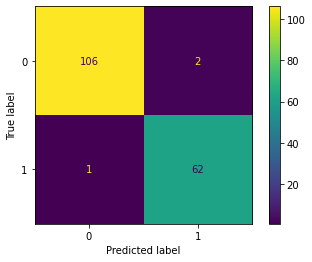


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
feature_select(important_list,X_train_oversample,y_train_oversample,X_test,y_test)

#減少特徵為23個,精準度反而提高

## 使用RFECV挑選


In [ ]:
from sklearn.feature_selection import RFECV
rfecv=RFECV(estimator=clf,step=1,cv=10,scoring='accuracy')
#since it uses cross validation, we should fit it to the whole dataset
rfecv.fit(X_train_oversample[important_list].values,y_train_oversample.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

RFECV(cv=10,
      estimator=SGDClassifier(alpha=0.01, average=True, l1_ratio=0.0,
                              loss='log', max_iter=5, penalty='elasticnet'),
      scoring='accuracy')

In [ ]:
#to get number of the features
display('Number of features:', rfecv.n_features_)

#to get feature names
RFECV_list=list(X_train_oversample[important_list].columns[rfecv.support_])
print(type(RFECV_list))

'Number of features:'

20

<class 'list'>


In [ ]:
RFECV_list

['worst concave points',
 'worst perimeter',
 'worst area',
 'mean concave points',
 'worst radius',
 'mean concavity',
 'mean radius',
 'mean perimeter',
 'area error',
 'worst concavity',
 'mean area',
 'radius error',
 'mean texture',
 'mean smoothness',
 'perimeter error',
 'concavity error',
 'concave points error',
 'worst texture',
 'worst smoothness',
 'worst symmetry']

In [ ]:
rfecv.cv_results_['mean_test_score']

array([0.87, 0.93, 0.95, 0.94, 0.95, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96,
       0.96, 0.97, 0.97, 0.96, 0.96, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97,
       0.97])

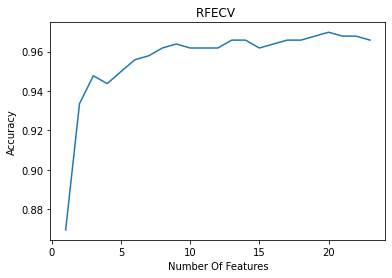

In [ ]:
#We can see that the best number of features is 9
plt.title("RFECV ")
plt.xlabel("Number Of Features")
plt.ylabel("Accuracy")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

召回率:  0.9841269841269841
精準度:  0.9538461538461539

特徵數量:  20
特徵:  ['worst concave points', 'worst perimeter', 'worst area', 'mean concave points', 'worst radius', 'mean concavity', 'mean radius', 'mean perimeter', 'area error', 'worst concavity', 'mean area', 'radius error', 'mean texture', 'mean smoothness', 'perimeter error', 'concavity error', 'concave points error', 'worst texture', 'worst smoothness', 'worst symmetry']


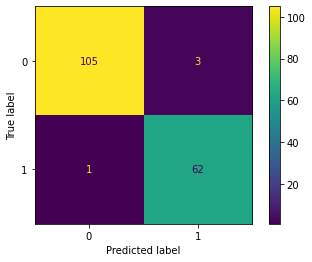


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.95      0.98      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
feature_select(RFECV_list,X_train_oversample,y_train_oversample,X_test,y_test)
#比隨機森林少了幾個參數

## 使用LinearSVC挑選

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train_oversample.values, y_train_oversample.values.ravel())
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_train_oversample.values)
X_new.shape


(498, 5)

In [ ]:
X_new

array([[-0.75, -0.73, -0.8 , -0.61, -0.61],
       [-0.8 , -0.93, -1.08, -0.19, -0.75],
       [-0.66, -0.67, -0.55, -0.07, -0.49],
       ...,
       [ 1.1 ,  0.58,  0.61,  2.63,  1.32],
       [ 0.43,  0.7 ,  0.78,  0.1 ,  0.5 ],
       [ 1.24, -0.55,  0.02,  0.31,  2.02]])

In [ ]:
line_svc=model.get_support()
print(line_svc)
print(line_svc.shape)

#看下選中的特徵

[False False False False False False False  True False False  True False
 False False False False False False False False  True  True False False
 False False False  True False False]
(30,)


In [ ]:
model.transform(X_train_oversample.values)

array([[-0.75, -0.73, -0.8 , -0.61, -0.61],
       [-0.8 , -0.93, -1.08, -0.19, -0.75],
       [-0.66, -0.67, -0.55, -0.07, -0.49],
       ...,
       [ 1.1 ,  0.58,  0.61,  2.63,  1.32],
       [ 0.43,  0.7 ,  0.78,  0.1 ,  0.5 ],
       [ 1.24, -0.55,  0.02,  0.31,  2.02]])

In [ ]:
LinearSVC_list=list(X_train_oversample.columns[line_svc])
LinearSVC_list
#篩選新的特徵下去跑機器學習

['mean concave points',
 'radius error',
 'worst radius',
 'worst texture',
 'worst concave points']

召回率:  0.9523809523809523
精準度:  0.9230769230769231

特徵數量:  5
特徵:  ['mean concave points', 'radius error', 'worst radius', 'worst texture', 'worst concave points']


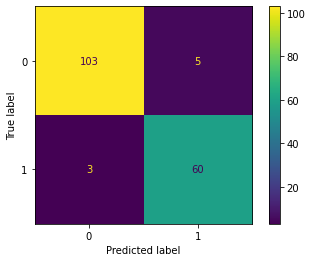


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       108
           1       0.92      0.95      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
feature_select(LinearSVC_list,X_train_oversample,y_train_oversample,X_test,y_test)

召回率:  0.9206349206349206
精準度:  0.9666666666666667

特徵數量:  5
特徵:  ['mean concave points', 'radius error', 'worst radius', 'worst texture', 'worst concave points']


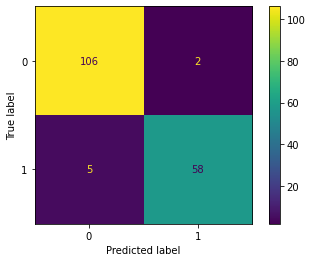


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
feature_select(LinearSVC_list,X_train,y_train,X_test,y_test)
#原始資料中的準確度

In [ ]:
print(LinearSVC_list)

['mean concave points', 'radius error', 'worst radius', 'worst texture', 'worst concave points']


# 結論:
特徵降為5個,與原先30個特徵去跑,準確率和召回率有降一些,但還是有90%以上。
一開始看的heapmap有極強的正向關係,後續被被程式所捨棄,代表降維可擇一即可。


影響最大的特徵為:

mean concave points	凹縫（輪廓的凹部分）平均值

radius error 半徑（點中心到邊緣的距離）標準差

worst radius 半徑（點中心到邊緣的距離）最大值

worst texture 文理（灰度值的標準差）最大值

worst concave points 凹縫（輪廓的凹部分）最大值

當用所有元素下去跑準確度會較高，但在需由使用者填入資料的情況下，
使用者需要輸入資料越少,對使用介面越友善。

基於準確率為可容許的程度下，用這5個元素下去作預測APP。